In [9]:
from utils import *
from tonotopy import *
import findpeaks
from skimage import measure
import os

t_pre = 0.5#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

In [10]:
path = "/auto/data2/eTheremin/ALTAI/ALTAI_20240822_SESSION_00/"


In [11]:
t_pre = 0.5#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)

In [12]:
data = np.load(path+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(path+'headstage_0/features_0.005.npy', allow_pickle=True)
gc = np.load(path+'headstage_0/good_clusters.npy', allow_pickle=True)
#gc = np.arange(32)


In [40]:
bd = np.load('/auto/data2/eTheremin/ALTAI/ALTAI_20240822_SESSION_00/heatmap_bandwidth.npy')

In [41]:
bd

array([[  460.,  1287.],
       [ 2684., 21024.],
       [ 3109., 11676.],
       [  343., 10079.],
       [ 2000., 10079.],
       [ 1111.,  1727.],
       [  343.,  2317.],
       [  715.,  3601.],
       [  397.,  1111.],
       [  533., 11676.],
       [ 1490., 11676.],
       [   nan,    nan],
       [ 1727., 18149.],
       [ 6484., 11676.],
       [ 1490.,  2000.],
       [ 1111.,  4172.],
       [ 6484., 18149.],
       [ 3109.,  4172.],
       [ 2317.,  3601.],
       [ 1490., 11676.],
       [ 1727.,  7511.],
       [ 4172., 11676.],
       [ 2684.,  7511.],
       [  959.,  2684.],
       [ 3109.,  8701.],
       [  715.,   959.],
       [  959.,  3601.],
       [ 3601., 11676.],
       [ 3601., 10079.],
       [ 3601., 18149.],
       [  460.,  1111.]])

In [13]:
tones = get_played_frequency(features, t_pre, t_post, bin_width, 'tracking')
# prendre les valeurs uniques de tones
unique_tones = np.load(path+'headstage_0/unique_tones.npy', allow_pickle=True)
unique_tones = sorted(np.unique(tones))

In [31]:
def get_tonotopy_t(data, features, t_pre, t_post, bin_width, good_clusters, unique_tones, max_freq, min_freq, condition, save_name):
    """""
    
    Fonction qui pour une session renvoie
    les heatmaps (psth x freq) pour la tonotopie mais ne les plot pas
    une heatmap par neurone
    uniquement les good_clusters
    attention : les heatmaps sont brutes (pas de traitements, ni smoothed... etc)
    
    input : data, features, t_pre, t_post (pour le psth), bins, good_clusters et condition ("tracking" ou "playback)
            unique_tones : ce sont les tons uniques qui ont été joués pendant la session (33 en tout)
            max_freq, min_freq : indices min et max des fréquences extrêmes à partir desquelles on ne prend pas les psth pour les heatmap
            (car pas assez de présentations donc ca déconne) min_freq = 5, max_freq = 7
            condition : 'tracking' ou 'playback
    ouput : 1 tableau contenant 1 heatmap par good_cluster 
            heatmap non smoothée
    """
    
    #je prends les psth de chaque neurones et la fréquence associée à chaque psth
    psth = get_psth(data, features, t_pre, t_post, bin_width, good_clusters, condition)
    tones = get_played_frequency(features, t_pre, t_post, bin_width, condition)
    tones = [int(x) for x in tones]
    unique_tones = [int(x) for x in unique_tones]
    
    psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)
    
    n_clus = len(good_clusters)
     

    tones = np.array(tones)
    tones = [int(x) for x in tones]
    unique_tones_test = np.unique(tones)
    unique_tones = [int(x) for x in unique_tones]
    
    heatmaps = []

    for c, clus in enumerate(good_clusters):  
        clus_psth = np.array(psth[c])
        print(len(clus_psth))
        average_psth_list = []
        
        for tone in unique_tones:
            mask = (tones == tone)
            if len(clus_psth[mask])>0: 
                print('ok')
                average_psth = np.mean(clus_psth[mask], axis=0)
                average_psth_list.append(average_psth)
                print(average_psth)
            else:
                print('shit')
                average_psth_list.append(np.zeros_like(psth_bins[:-1]))
    
        average_psths_array = np.array(average_psth_list)
        
        t_0 = int(t_pre/bin_width)
        # faire la moyenne sur toute la heatmap
        #mu = np.nanmean(average_psths_array[:][0:t_0], axis=0)
        #mu = np.nanmean(mu, axis=0)
        
        #je retire la moyenne de la heatmap avant le stim
        #trouver le bin du stim
        
        
        #heatmap = average_psths_array[min_freq:-max_freq]-mu
        #heatmap = average_psths_array-mu
        heatmap = average_psths_array 
        heatmaps.append(heatmap)
        #np.save(save_name, np.array(heatmaps))
    
    return heatmaps

In [37]:

tones = get_played_frequency(features, t_pre, t_post, bin_width, 'tracking')
tones = [int(x) for x in tones]
unique_tones = [int(x) for x in unique_tones]
    
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)
    
n_clus = len(gc)
     

tones = np.array(tones)
tones = [int(x) for x in tones]
unique_tones = [int(x) for x in unique_tones]
for tone in unique_tones:
    mask = (tones == tone)
    print(tones[mask])


3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601
3601


In [34]:
unique_tones

[296,
 343,
 397,
 460,
 533,
 617,
 715,
 828,
 959,
 1111,
 1287,
 1490,
 1727,
 2000,
 2317,
 2684,
 3109,
 3601,
 4172,
 4832,
 5598,
 6484,
 7511,
 8701,
 10079,
 11676,
 18149,
 21024]

In [32]:
heatmaps = get_tonotopy_t(data, features, t_pre, t_post, bin_width, gc, unique_tones, 0, 0, 'tracking', 'heatmaps')


4597
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
4597
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
4597
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
4597
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
4597
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
4597
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
4597
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


In [19]:
heatmaps

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

calculating heatmaps
vmin =  -0.0 and vmax =  0.0


ValueError: vmin, vcenter, and vmax must be in ascending order

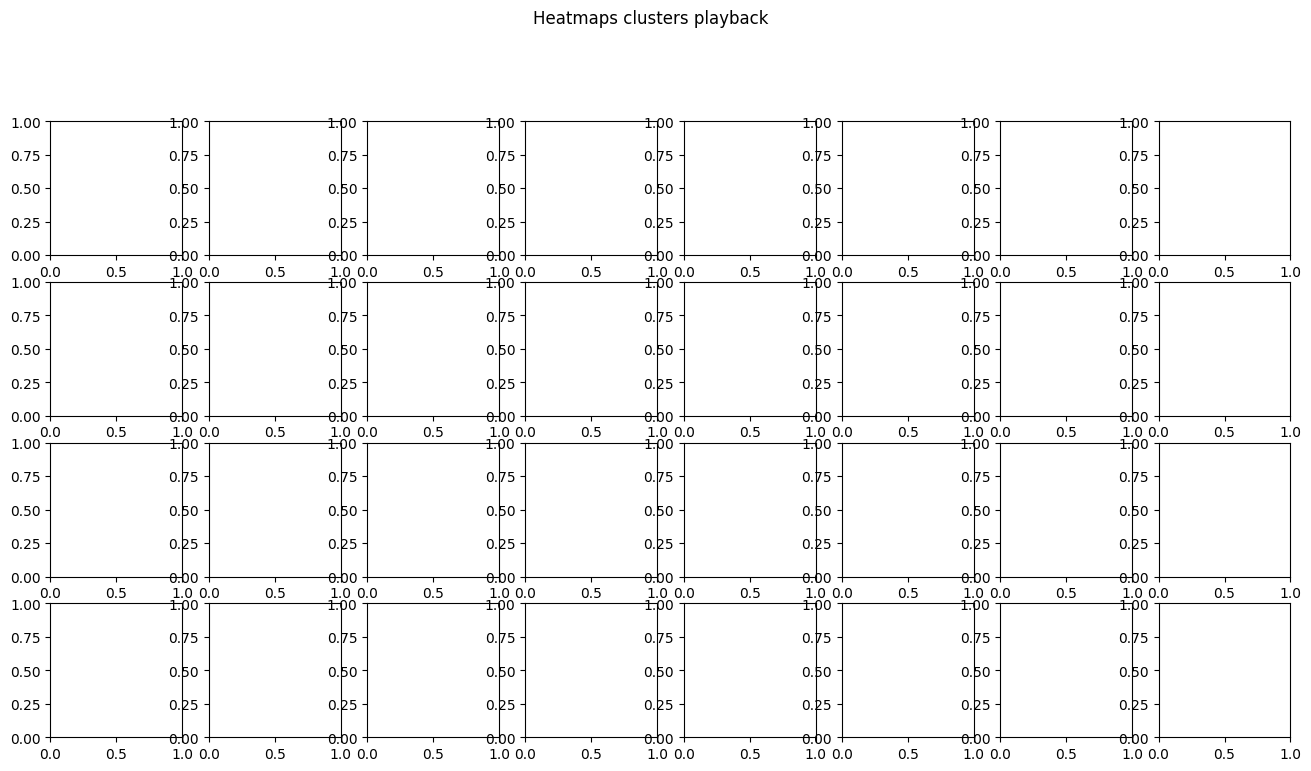

In [8]:
if not os.path.exists(path + 'heatmap_plot_playback.npy'):
    print("calculating heatmaps")
    heatmaps = get_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, 0, 0, 'playback', 'heatmaps')

else:
    heatmaps = np.load(path + 'heatmap_plot_playback.npy', allow_pickle = True)
    print('heatmaps already exist')

#récupérer les heatmaps
plot_heatmap_bandwidth(heatmaps,3, gc,unique_tones, 2, 2, bin_width, psth_bins, t_pre,path, '', 'playback')

In [8]:
heatmaps = get_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, 0, 0, 'tracking', 'heatmaps')


In [18]:
tones = get_played_frequency(features, t_pre, t_post, bin_width, 'tracking')

In [38]:

def get_tonotopy(data, features, t_pre, t_post, bin_width, good_clusters, unique_tones, max_freq, min_freq, condition, save_name):
    """""
    
    Fonction qui pour une session renvoie
    les heatmaps (psth x freq) pour la tonotopie mais ne les plot pas
    une heatmap par neurone
    uniquement les good_clusters
    attention : les heatmaps sont brutes (pas de traitements, ni smoothed... etc)
    
    input : data, features, t_pre, t_post (pour le psth), bins, good_clusters et condition ("tracking" ou "playback)
            unique_tones : ce sont les tons uniques qui ont été joués pendant la session (33 en tout)
            max_freq, min_freq : indices min et max des fréquences extrêmes à partir desquelles on ne prend pas les psth pour les heatmap
            (car pas assez de présentations donc ca déconne) min_freq = 5, max_freq = 7
            condition : 'tracking' ou 'playback
    ouput : 1 tableau contenant 1 heatmap par good_cluster 
            heatmap non smoothée
    """
    
    #je prends les psth de chaque neurones et la fréquence associée à chaque psth
    psth = get_psth(data, features, t_pre, t_post, bin_width, good_clusters, condition)
    tones = get_played_frequency(features, t_pre, t_post, bin_width, condition)
    tones = [int(x) for x in tones]
    unique_tones = [int(x) for x in unique_tones]
    
    psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)
    
    n_clus = len(good_clusters)
     

    tones = np.array(tones)
    tones = [int(x) for x in tones]
    unique_tones_test = np.unique(tones)
    unique_tones = np.array([int(x) for x in unique_tones])

    heatmaps = []

    for c, clus in enumerate(good_clusters):  
        clus_psth = np.array(psth[c])
        average_psth_list = []
        
        for tone in unique_tones:

            mask = (tones == tone)
            if len(clus_psth[mask])>0: #au moins 20 présentations d'une fréquence
                average_psth = np.mean(clus_psth[mask], axis=0)
                average_psth_list.append(average_psth)
                print(average_psth)
            else:
                average_psth_list.append(np.zeros_like(psth_bins[:-1]))
    
        average_psths_array = np.array(average_psth_list)
        
        t_0 = int(t_pre/bin_width)
        # faire la moyenne sur toute la heatmap
        #mu = np.nanmean(average_psths_array[:][0:t_0], axis=0)
        #mu = np.nanmean(mu, axis=0)
        
        #je retire la moyenne de la heatmap avant le stim
        #trouver le bin du stim
        
        
        #heatmap = average_psths_array[min_freq:-max_freq]-mu
        #heatmap = average_psths_array-mu
        heatmap = average_psths_array 
        heatmaps.append(heatmap)
    
    return heatmaps

In [39]:
hmm =  get_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, 0, 0, 'tracking', "")

[0.28571429 0.28571429 0.14285714 0.14285714 0.14285714 0.28571429
 0.14285714 0.14285714 0.         0.         0.         0.42857143
 0.14285714 0.28571429 0.42857143 0.         0.14285714 0.28571429
 0.42857143 0.         0.         0.         0.14285714 0.14285714
 0.28571429 0.28571429 0.57142857 0.         0.28571429 0.
 0.28571429 0.14285714 0.42857143 0.         0.14285714 0.
 0.42857143 0.14285714 0.28571429 0.         0.14285714 0.
 0.14285714 0.28571429 0.         0.14285714 0.14285714 0.28571429
 0.42857143 0.28571429 0.14285714 0.         0.         0.28571429
 0.14285714 0.28571429 0.         0.14285714 0.14285714 0.14285714
 0.14285714 0.         0.14285714 0.         0.         0.14285714
 0.28571429 0.28571429 0.28571429 0.         0.14285714 0.
 0.14285714 0.         0.         0.28571429 0.         0.28571429
 0.14285714 0.42857143 0.         0.14285714 0.28571429 0.
 0.14285714 0.14285714 0.14285714 0.         0.         0.14285714
 0.28571429 0.         0.         0

In [28]:
psth = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')
tones = get_played_frequency(features, t_pre, t_post, bin_width, 'tracking')
tones = [int(x) for x in tones]
unique_tones = [int(x) for x in unique_tones]

In [29]:
tones

[5598,
 21024,
 1490,
 8701,
 715,
 4832,
 343,
 2684,
 533,
 18149,
 959,
 397,
 6484,
 190,
 15667,
 1287,
 1727,
 11676,
 255,
 828,
 7511,
 220,
 617,
 296,
 10079,
 1111,
 13525,
 3109,
 2000,
 2317,
 4172,
 460,
 3601,
 296,
 6484,
 3109,
 8701,
 21024,
 1287,
 2317,
 2000,
 715,
 15667,
 220,
 959,
 13525,
 617,
 7511,
 190,
 397,
 1490,
 10079,
 3601,
 18149,
 828,
 4832,
 533,
 5598,
 343,
 255,
 1111,
 460,
 2684,
 1727,
 11676,
 4172,
 4172,
 828,
 343,
 8701,
 5598,
 3601,
 533,
 1727,
 2000,
 617,
 15667,
 6484,
 220,
 255,
 959,
 18149,
 460,
 13525,
 10079,
 7511,
 296,
 11676,
 397,
 190,
 1287,
 21024,
 4832,
 3109,
 1490,
 1111,
 2684,
 2317,
 715,
 1490,
 21024,
 18149,
 255,
 3601,
 8701,
 6484,
 296,
 1287,
 10079,
 2000,
 4832,
 397,
 715,
 828,
 7511,
 2317,
 959,
 1111,
 5598,
 15667,
 13525,
 533,
 3109,
 617,
 2684,
 4172,
 220,
 11676,
 1727,
 343,
 460,
 190,
 715,
 1727,
 1490,
 828,
 5598,
 255,
 2317,
 15667,
 2684,
 397,
 343,
 7511,
 1111,
 13525,
 1007

In [30]:
unique_tones

[]

In [11]:
features

array([{'Played_frequency': 0.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 0.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       ...,
       {'Played_frequency': 11676.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 11676.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False},
       {'Played_frequency': 11676.0, 'Condition': 0.0, 'Block': 0.0, 'Frequency_changes': False}],
      dtype=object)

In [9]:
heatmaps

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64)]